# Question 4

In [1]:
# Necassary imports
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image # to read .bmp image
from mpl_toolkits import mplot3d # for 3D plots

In [2]:
# QUESTION 4
print('QUESTION 4\n')

QUESTION 4



In [3]:
# PART A
print('PART A\n')

PART A



In [4]:
def DOG(x, y, sigma_c, sigma_s):
    """
    Implements an on-center difference-of-gaussians (DOG) center-surround 
    filter centered at 0. 
    Args:
        x: x coordinate
        y: y coordinate
        sigma_c: Central gaussian width
        sigma_s: Surround gaussian width
    Returns: 
        result: The output of the DOG filter, D(x, y)
    """
    const_c = 1 / (2 * sigma_c ** 2)
    const_s = 1 / (2 * sigma_s ** 2)
    exp_c = np.exp(-(x ** 2 + y ** 2) * const_c)
    exp_s = np.exp(-(x ** 2 + y ** 2) * const_s)
    result = (const_c / np.pi) * exp_c - (const_s / np.pi) * exp_s
    return result

In [5]:
SIGMA_C = 2
SIGMA_S = 4
SHAPE = (21, 21)

In [6]:
def DOG_receptive_field(x, y, shape, sigma_c, sigma_s):
    """
    Samples a matrix of the specified shape using the DOG filter.
    Args:
        x: x coordinate of the receptive filter's center
        y: y coordinate of the receptive filter's center
        shape: Shape of the sampled matrix
        sigma_c: Central gaussian width for the receptive filter
        sigma_s: Surround gaussian width for the receptive filter
    Returns:
        sample: Matrix sample generated from the DOG filter
    """
    sample = np.zeros(shape)
    for i in range(- int(shape[0] / 2), 1 + int(shape[0] / 2)):
        for j in range(- int(shape[1] / 2), 1 + int(shape[1] / 2)):
            sample[x + i + int(shape[0] / 2),
                   y + j + int(shape[1] / 2)] = DOG(x + i, y + j, sigma_c, sigma_s)
    return sample

In [7]:
DOG_kernel = DOG_receptive_field(0, 0, SHAPE, SIGMA_C, SIGMA_S)

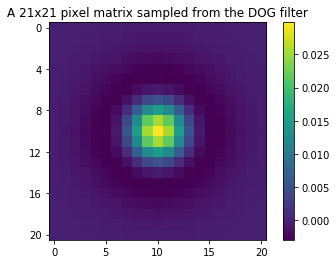

In [8]:
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.imshow(DOG_kernel)
plt.yticks(np.arange(0, SHAPE[0], int(SHAPE[0] / 5)))
plt.title('A 21x21 pixel matrix sampled from the DOG filter')
plt.colorbar()
plt.show(block=False)

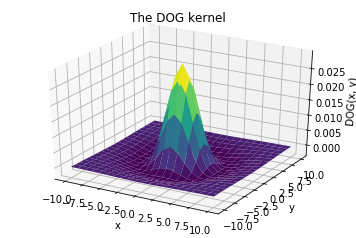

In [9]:
fig_3D = plt.figure(figure_num)
figure_num += 1
ax_3D = plt.axes(projection='3d')
X_PLT, Y_PLT = np.meshgrid(np.arange(- int(SHAPE[0] / 2), 1 + int(SHAPE[0] / 2)),
                           np.arange(- int(SHAPE[1] / 2), 1 + int(SHAPE[1] / 2)))
ax_3D.plot_surface(X_PLT, Y_PLT, DOG_kernel, rstride=1, cstride=1, 
                   cmap='viridis', edgecolor='none')
ax_3D.set_xlabel('x')
ax_3D.set_ylabel('y')
ax_3D.set_zlabel('DOG(x, y)')
plt.title('The DOG kernel')
plt.show(block=False)

In [10]:
# PART B
print('PART B\n')

PART B



In [11]:
image = Image.open("hw2_image.bmp")
image = np.array(image)
x_range = np.shape(image)[0]
y_range = np.shape(image)[1]
# Since the image is grayscale, we only need a single color channel
image = image[:,:, 0] 

In [12]:
def convolve(image, kernel):
    """
    Given a kernel matrix, computes the 2 dimensional convolution 
    of the kernel and an image.
    Args:
        image: The given image
        kernel: The given kernel matrix to be used in the convolution
    Returns:
        result: The resulting matrix after the convolution
    """
    pad_x = int(np.shape(kernel)[0] / 2)
    pad_y = int(np.shape(kernel)[1] / 2)
    img_padding = np.zeros((2 * pad_x + np.shape(image)[0], 2 * pad_y + np.shape(image)[1]))
    img_padding[pad_x: np.shape(image)[0] + pad_x, pad_y: np.shape(image)[1] + pad_y] = image
    result = np.zeros(np.shape(image))
    for i in range(pad_x, np.shape(image)[0] + pad_x):
        for j in range(pad_y, np.shape(image)[1] + pad_y):
            result[i - pad_x, j - pad_y] = np.sum(
                img_padding[i - pad_x: i + pad_x + 1, j - pad_y: j + pad_y + 1] * kernel)
    return result

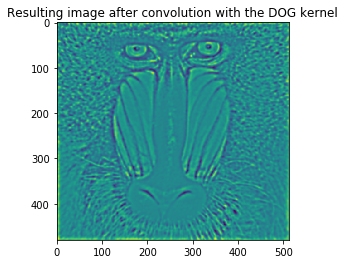

In [13]:
DOG_image = convolve(image, DOG_kernel)
plt.figure(figure_num)
figure_num += 1
plt.imshow(DOG_image)
plt.title('Resulting image after convolution with the DOG kernel')
plt.show(block=False)

In [14]:
# PART C 
print('PART C')

PART C


In [15]:
def detect_edges(filtered_image, threshold):
    """
    Given an appropriately filtered image and an optimal threshold
    value, sets the pixels to 1 if they are above the threshold, and
    to 0 if they are below the threshold.
    Args:
        filtered_image: The image that is filtered such that it is
            ready for thresholding
        threshold: An optimal threshold value for edge detection
    Returns:
        result: Resulting image after thresholding
    """
    result = filtered_image
    result[np.where(filtered_image >= threshold)] = 1
    result[np.where(filtered_image < threshold)] = 0
    return result

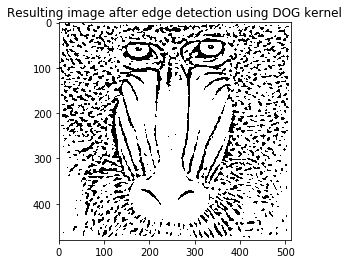

In [16]:
THRESHOLD = -4
img_edges_detected = detect_edges(DOG_image, THRESHOLD)
plt.figure(figure_num)
figure_num += 2
plt.imshow(img_edges_detected, cmap='gray')
plt.title('Resulting image after edge detection using DOG kernel')
plt.show(block=False)

In [17]:
# PART D
print('PART D')

PART D


In [18]:
def Gabor(x, theta, sigma_l, sigma_w, phi, lambda_):
    """
    Implements a Gabor filter with a specified orientation, and other
    specified parameters.
    filter centered at 0. 
    Args:
        x: The coordinate vector
        theta: The orientation
        sigma_l: A constant
        sigma_w: A constant
        phi: The phase angle
        lambda_: A constant
    Returns: 
        result: The output of the Gabor filter, D(x)
    """
    k = np.array([np.sin(theta), np.cos(theta)])
    k_orth = np.array([np.cos(theta), -np.sin(theta)])
    inner_k = k.dot(x)
    inner_k_orth = k_orth.dot(x)
    exp = np.exp(- (inner_k ** 2) / (2 * (sigma_l ** 2)) - (inner_k_orth ** 2) / (2 * (sigma_w ** 2)))
    result = exp * np.cos(phi + 2 * np.pi * inner_k_orth / lambda_)
    return result

In [19]:
def Gabor_receptive_field(x, y, shape, theta, sigma_l, sigma_w, phi, lambda_):
    """
    Samples a matrix of the specified shape using the Gabor filter.
    Args:
        Args:
            x: x coordinate for the Gabor filter
            y: y coordinate for the Gabor filter
            shape: Shape of the sampled matrix
            theta: The orientation for the Gabor filter
            sigma_l: A constant for the Gabor filter
            sigma_w: A constant for the Gabor filter
            phi: The phase angle for the Gabor filter
            lambda_: A constant for the Gabor filter
    Returns:
        sample: Matrix sample generated from the Gabor filter
    """
    sample = np.zeros(shape)
    for i in range(- int(shape[0] / 2), 1 + int(shape[0] / 2)):
        for j in range(- int(shape[1] / 2), 1 + int(shape[1] / 2)):
            sample[x + i + int(shape[0] / 2),
                   y + j + int(shape[1] / 2)] = Gabor(np.array([x + i, y + j]),
                                                      theta, sigma_l, sigma_w, 
                                                      phi, lambda_)
    return sample

In [20]:
THETA_0 = 0
THETA_30 = np.pi / 6
THETA_60 = np.pi / 3
THETA_90 = np.pi / 2
SIGMA_L = 3
SIGMA_W = 3
PHI = 0
LAMBDA = 6

In [21]:
Gabor_kernel_90 = Gabor_receptive_field(0, 0, SHAPE, THETA_90, SIGMA_L, SIGMA_W, PHI, LAMBDA)

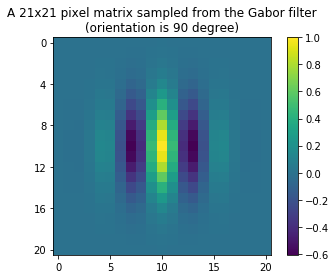

In [22]:
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_kernel_90)
plt.yticks(np.arange(0, SHAPE[0], int(SHAPE[0] / 5)))
plt.title('A 21x21 pixel matrix sampled from the Gabor filter\n(orientation is 90 degree)')
plt.colorbar()
plt.show(block=False)

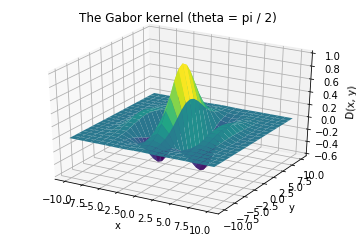

In [23]:
fig_3D = plt.figure(figure_num)
figure_num += 1
ax_3D = plt.axes(projection='3d')
ax_3D.plot_surface(X_PLT, Y_PLT, Gabor_kernel_90, rstride=1, cstride=1, 
                   cmap='viridis', edgecolor='none')
ax_3D.set_xlabel('x')
ax_3D.set_ylabel('y')
ax_3D.set_zlabel('D(x, y)')
plt.title('The Gabor kernel (theta = pi / 2)')
plt.show(block=False)

In [24]:
# PART E 
print('PART E')

PART E


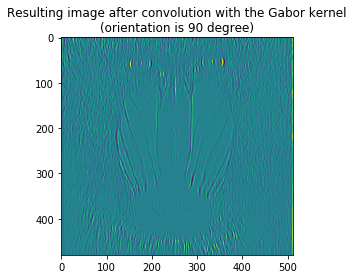

In [25]:
Gabor_image_90 = convolve(image, Gabor_kernel_90)
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_image_90)
plt.title('Resulting image after convolution with the Gabor kernel'
          '\n(orientation is 90 degree)')
plt.show(block=False)

In [26]:
# PART F 
print('PART F')

PART F


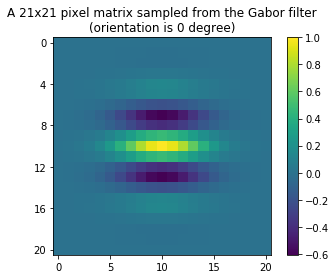

In [27]:
Gabor_kernel_0 = Gabor_receptive_field(0, 0, SHAPE, THETA_0, SIGMA_L, SIGMA_W, PHI, LAMBDA)
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_kernel_0)
plt.yticks(np.arange(0, SHAPE[0], int(SHAPE[0] / 5)))
plt.title('A 21x21 pixel matrix sampled from the Gabor filter\n(orientation is 0 degree)')
plt.colorbar()
plt.show(block=False)

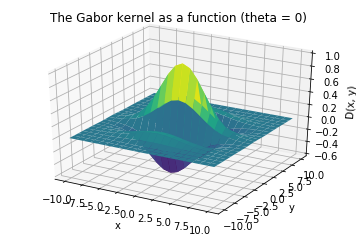

In [28]:
fig_3D = plt.figure(figure_num)
figure_num += 1
ax_3D = plt.axes(projection='3d')
ax_3D.plot_surface(X_PLT, Y_PLT, Gabor_kernel_0, rstride=1, cstride=1, 
                   cmap='viridis', edgecolor='none')
ax_3D.set_xlabel('x')
ax_3D.set_ylabel('y')
ax_3D.set_zlabel('D(x, y)')
plt.title('The Gabor kernel as a function (theta = 0)')
plt.show(block=False)

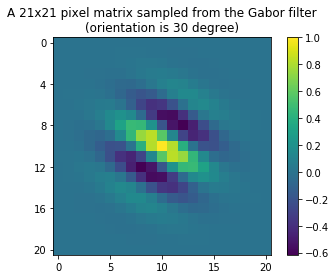

In [29]:
Gabor_kernel_30 = Gabor_receptive_field(0, 0, SHAPE, THETA_30, SIGMA_L, SIGMA_W, PHI, LAMBDA)
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_kernel_30)
plt.yticks(np.arange(0, SHAPE[0], int(SHAPE[0] / 5)))
plt.title('A 21x21 pixel matrix sampled from the Gabor filter\n(orientation is 30 degree)')
plt.colorbar()
plt.show(block=False)

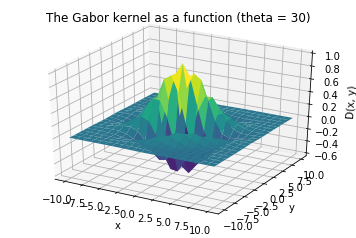

In [30]:
fig_3D = plt.figure(figure_num)
figure_num += 1
ax_3D = plt.axes(projection='3d')
ax_3D.plot_surface(X_PLT, Y_PLT, Gabor_kernel_30, rstride=1, cstride=1, 
                   cmap='viridis', edgecolor='none')
ax_3D.set_xlabel('x')
ax_3D.set_ylabel('y')
ax_3D.set_zlabel('D(x, y)')
plt.title('The Gabor kernel as a function (theta = 30)')
plt.show(block=False)

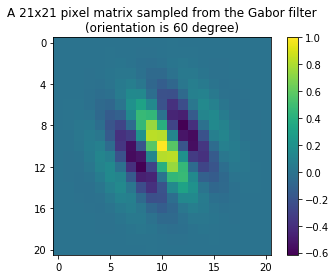

In [31]:
Gabor_kernel_60 = Gabor_receptive_field(0, 0, SHAPE, THETA_60, SIGMA_L, SIGMA_W, PHI, LAMBDA)
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_kernel_60)
plt.yticks(np.arange(0, SHAPE[0], int(SHAPE[0] / 5)))
plt.title('A 21x21 pixel matrix sampled from the Gabor filter\n(orientation is 60 degree)')
plt.colorbar()
plt.show(block=False)

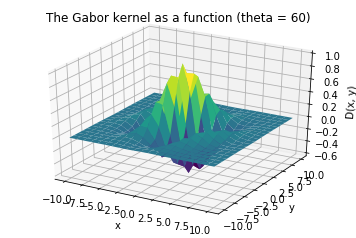

In [32]:
fig_3D = plt.figure(figure_num)
figure_num += 1
ax_3D = plt.axes(projection='3d')
ax_3D.plot_surface(X_PLT, Y_PLT, Gabor_kernel_60, rstride=1, cstride=1, 
                   cmap='viridis', edgecolor='none')
ax_3D.set_xlabel('x')
ax_3D.set_ylabel('y')
ax_3D.set_zlabel('D(x, y)')
plt.title('The Gabor kernel as a function (theta = 60)')
plt.show(block=False)

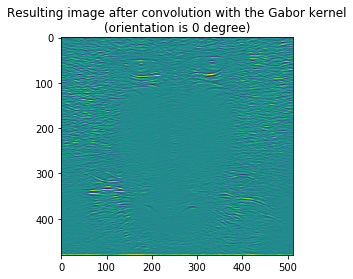

In [33]:
Gabor_image_0 = convolve(image, Gabor_kernel_0)
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_image_0)
plt.title('Resulting image after convolution with the Gabor kernel'
          '\n(orientation is 0 degree)')
plt.show(block=False)

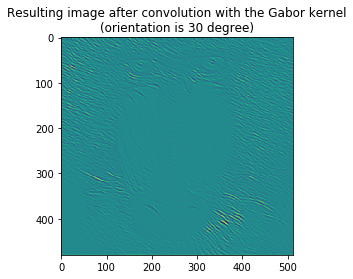

In [34]:
Gabor_image_30 = convolve(image, Gabor_kernel_30)
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_image_30)
plt.title('Resulting image after convolution with the Gabor kernel'
          '\n(orientation is 30 degree)')
plt.show(block=False)

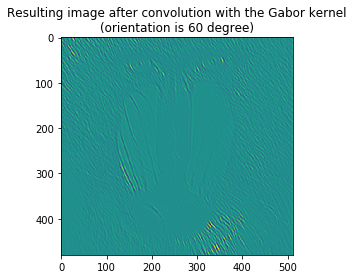

In [35]:
Gabor_image_60 = convolve(image, Gabor_kernel_60)
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_image_60)
plt.title('Resulting image after convolution with the Gabor kernel'
          '\n(orientation is 60 degree)')
plt.show(block=False)

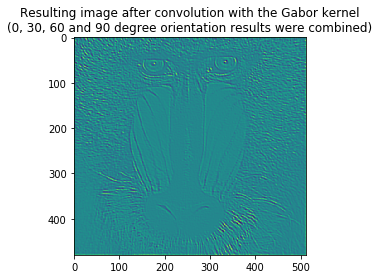

In [36]:
Gabor_image_combined = Gabor_image_0 + Gabor_image_30 + Gabor_image_60 + Gabor_image_90
plt.figure(figure_num)
figure_num += 1
plt.imshow(Gabor_image_combined)
plt.title('Resulting image after convolution with the Gabor kernel'
          '\n(0, 30, 60 and 90 degree orientation results were combined)')
plt.show(block=False)

In [37]:
plt.show()